# $\Phi$-SO demo : Free fall

## Package import

In [1]:
# External packages
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# Internal code import
import physo
import physo.learn.monitoring as monitoring

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.

Multiprocessing start method : spawn
Running from notebook : True
Is CUDA available : False
Total nb. of CPUs :  8
Recommended config {'parallel_mode': False, 'n_cpus': 8}
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run phys

/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:81: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/reward.py:252: UserWarning: Parallel mode is not available on this system, switching to non parallel mode.
  warnings.warn("Parallel mode is not available on this system, switching to non parallel mode.")


## Fixing seed

In [3]:
# Seed
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)

## Dataset

In [4]:
NOISE_LEVEL = 0.0
data_size = 100

multi_X = []
multi_y = []

low = 0
up  = 1

# Object 1
t  = np.random.uniform(low, up, data_size)
g  = 9.81
v0 = 7.34
h0 = 1.23
y  = -0.5*g*t**2 + v0*t + h0
X = np.stack((t,), axis=0)
y_rms = ((y ** 2).mean()) ** 0.5
epsilon = NOISE_LEVEL * np.random.normal(0, y_rms, len(y))
y = y + epsilon
multi_X.append(X)
multi_y.append(y)

# Object 2
t  = np.random.uniform(low, up, data_size)
g  = 9.81
v0 = -1.17
h0 = 6.48
y  = -0.5*g*t**2 + v0*t + h0
X = np.stack((t,), axis=0)
y_rms = ((y ** 2).mean()) ** 0.5
epsilon = NOISE_LEVEL * np.random.normal(0, y_rms, len(y))
y = y + epsilon
multi_X.append(X)
multi_y.append(y)


# Object 3
t  = np.random.uniform(low, up, data_size)
g  = 9.81
v0 = 5.74
h0 = -2.13
y  = -0.5*g*t**2 + v0*t + h0
X = np.stack((t,), axis=0)
y_rms = ((y ** 2).mean()) ** 0.5
epsilon = NOISE_LEVEL * np.random.normal(0, y_rms, len(y))
y = y + epsilon
multi_X.append(X)
multi_y.append(y)

# Object 4
t  = np.random.uniform(low, up, data_size)
g  = 9.81
v0 = 2.12
h0 = 1.42
y  = -0.5*g*t**2 + v0*t + h0
X = np.stack((t,), axis=0)
y_rms = ((y ** 2).mean()) ** 0.5
epsilon = NOISE_LEVEL * np.random.normal(0, y_rms, len(y))
y = y + epsilon
multi_X.append(X)
multi_y.append(y)

Dataset plot

/var/folders/_0/hgcsx0091_b2v_kzxs1_yqyh0000gp/T/ipykernel_77072/3547374387.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno', n_objects)
/var/folders/_0/hgcsx0091_b2v_kzxs1_yqyh0000gp/T/ipykernel_77072/3547374387.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(multi_X[i][0], multi_y[i], c=cmap(i), label="Object %i"%(i))


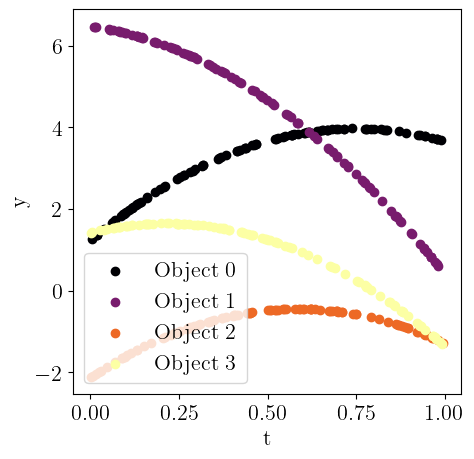

In [5]:
n_objects = len(multi_X)

cmap = plt.cm.get_cmap('inferno', n_objects)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.set_xlabel("t")
ax.set_ylabel("y")
for i in range(n_objects):
    ax.scatter(multi_X[i][0], multi_y[i], c=cmap(i), label="Object %i"%(i))
ax.legend()
fig.savefig("data.png")
plt.show()

## Running Class SR task

### Logging config

In [6]:
save_path_training_curves = 'demo_curves.png'
save_path_log             = 'demo.log'

run_logger     = lambda : monitoring.RunLogger(save_path = save_path_log,
                                                do_save = True)

run_visualiser = lambda : monitoring.RunVisualiser (epoch_refresh_rate = 1,
                                           save_path = save_path_training_curves,
                                           do_show   = False,
                                           do_prints = True,
                                           do_save   = True, )

### Run

In [ ]:
# Running SR task
expression, logs = physo.ClassSR(multi_X, multi_y,
                                     # Giving names of variables (for display purposes)
                                     X_names = [ "t" ,       ],
                                     # Giving units of input variables
                                     X_units = [ [0, 0, 0] , ],
                                     # Giving name of root variable (for display purposes)
                                     y_name  = "y",
                                     # Giving units of the root variable
                                     y_units = [0, 0, 0],
                                     # Fixed constants
                                     fixed_consts       = [ 1.      ],
                                     # Units of fixed constants
                                     fixed_consts_units = [ [0, 0, 0] ],
                                     # Free constants names (for display purposes)
                                     class_free_consts_names = [ "c0"       ],
                                     # Units of free constants
                                     class_free_consts_units = [ [0, 0, 0]  ],
                                     # Free constants names (for display purposes)
                                     spe_free_consts_names = [ "k0"       , "k1"       , "k2"       ],
                                     # Units of free constants
                                     spe_free_consts_units = [ [0, 0, 0]  , [0, 0, 0]  , [0, 0, 0]  ],
                                     # Run config
                                     run_config = physo.config.config0b.config0b,

                                     op_names = ["mul", "add", "sub", "div", "inv", "n2", "sqrt", "neg", "exp", "log", "sin", "cos"],
                                     get_run_logger     = run_logger,
                                     get_run_visualiser = run_visualiser,

                                     parallel_mode = True,
                                     epochs = int(1e9),
                                     )

Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.

Multiprocessing start method : spawn
Running from notebook : True
Is CUDA available : False
Total nb. of CPUs :  8
Recommended config {'parallel_mode': False, 'n_cpus': 8}
SR task started...


/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:81: UserWarning: Parallel mode is not available because physo is being ran from a notebook using 'spawn' multiprocessing start method (multiprocessing.get_start_method() = 'spawn'). Run physo from a python script to use parallel mode.
  warnings.warn(msg)
/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/reward.py:252: UserWarning: Parallel mode is not available on this system, switching to non parallel mode.
  warnings.warn("Parallel mode is not available on this system, switching to non parallel mode.")


=========== Epoch 00000 ===========
-> Time 2.08 s

Overall best  at R=0.867307
-> Raw expression : 
     sin(k₂ + t)
k₁ - ───────────
          c₀    

Best of epoch at R=0.867307
-> Raw expression : 
     sin(k₂ + t)
k₁ - ───────────
          c₀    


=========== Epoch 00001 ===========
-> Time 78.13 s

Overall best  at R=0.867307
-> Raw expression : 
     sin(k₂ + t)
k₁ - ───────────
          c₀    

Best of epoch at R=0.863925
-> Raw expression : 
               ⎛         k₀⎞
-(k₂ - cos(t))⋅⎝t + 1.0⋅ℯ  ⎠


=========== Epoch 00002 ===========
-> Time 70.43 s

Overall best  at R=0.867307
-> Raw expression : 
     sin(k₂ + t)
k₁ - ───────────
          c₀    

Best of epoch at R=0.852960
-> Raw expression : 
         ⎛                  2⎞
      0.5⎜⎛   ⎛  0.5⎞    t ⎞ ⎟
k₂⋅sin   ⎜⎜log⎝k₀   ⎠ + ───⎟ ⎟
         ⎜⎜               2⎟ ⎟
         ⎝⎝             c₀ ⎠ ⎠




/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:453: UserWarning: Unable to optimize free constants of prog [log sqrt sqrt sub div sqrt sin add add k2 1.0 k1 1.0 c0] -> r = 0
  warnings.warn("Unable to optimize free constants of prog %s -> r = 0" % (str(prog)))
/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:453: UserWarning: Unable to optimize free constants of prog [neg mul t log inv add mul cos neg exp k1 k0 k1] -> r = 0
  warnings.warn("Unable to optimize free constants of prog %s -> r = 0" % (str(prog)))
/Users/wtenachi/Documents/ASTRO_research/projects/AI_physicist/my_AI_physicist/PhySO/PhySO/physo/physym/batch_execute.py:453: UserWarning: Unable to optimize free constants of prog [log div sin add sub sub n2 add add k1 mul t 1.0 t c0 t t k0] -> r = 0
  warnings.warn("Unable to optimize free constants of prog %s -> r = 0" % (str(prog)))


=========== Epoch 00003 ===========
-> Time 73.38 s

Overall best  at R=0.871595
-> Raw expression : 
⎛               2    1.0⎞        
⎝- (t + cos(k₁))  + ℯ   ⎠⋅cos(k₁)
─────────────────────────────────
                k₂               

Best of epoch at R=0.871595
-> Raw expression : 
⎛               2    1.0⎞        
⎝- (t + cos(k₁))  + ℯ   ⎠⋅cos(k₁)
─────────────────────────────────
                k₂               




## Inspecting pareto front expressions

In [ ]:
pareto_front_complexities, pareto_front_expressions, pareto_front_r, pareto_front_rmse = logs.get_pareto_front()

In [ ]:
expression.get_infix_sympy()